In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/social-network-ads/Social_Network_Ads.csv


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('/kaggle/input/social-network-ads/Social_Network_Ads.csv')

In [5]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [6]:
data.iloc[:,2:4]

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [7]:
# to convert it to numpy array
X = data.iloc[:,2:4].values

In [8]:
X.shape

(400, 2)

In [9]:
y = data.iloc[:, -1].values

In [10]:
y.shape

(400,)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20)

In [12]:
X_train.shape

(320, 2)

In [13]:
y_train.shape

(320,)

In [14]:
X_test.shape

(80, 2)

In [15]:
# the value of estimated salry is too large so we need to scale it down like the age value

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [16]:
X_train = scaler.fit_transform(X_train)
X_train

array([[-0.95033997,  0.43246373],
       [-0.6575523 , -1.06664589],
       [-0.07197697,  0.10912636],
       [-0.26716875, -0.27299962],
       [ 0.31840659, -0.30239393],
       [-0.26716875, -0.36118254],
       [-0.26716875,  1.10853278],
       [-1.14553175, -0.53754838],
       [-0.26716875,  0.07973206],
       [ 0.12321481, -0.27299962],
       [-1.73110709, -1.38998326],
       [ 1.0991737 , -0.15542239],
       [ 0.80638604,  1.37308153],
       [-0.07197697,  0.02094344],
       [ 1.48955726,  0.05033775],
       [-0.95033997, -0.33178823],
       [ 0.51359837,  1.72581321],
       [-1.43831942, -1.47816618],
       [ 1.97753671, -1.38998326],
       [ 0.31840659, -0.53754838],
       [-1.73110709,  0.34428081],
       [ 0.12321481,  1.04974416],
       [-0.16957286, -0.30239393],
       [-1.14553175, -1.1254345 ],
       [ 0.2208107 , -0.27299962],
       [ 1.68474904, -0.91967436],
       [-0.46236053, -0.30239393],
       [ 0.31840659,  0.2854922 ],
       [-0.26716875,

In [17]:
X_test = scaler.transform(X_test)
X_test

array([[-1.92629887, -0.77270283],
       [ 0.02561892, -0.59633699],
       [-0.6575523 ,  0.02094344],
       [-1.14553175,  0.40306943],
       [ 1.87994082, -1.0960402 ],
       [ 1.19676959, -0.77270283],
       [-0.36476464, -1.33119465],
       [ 1.00157781, -0.86088575],
       [-1.6335112 ,  0.52064665],
       [ 0.12321481,  0.19730928],
       [-0.16957286, -0.53754838],
       [-1.73110709,  0.10912636],
       [ 0.90398193, -0.59633699],
       [-0.26716875, -0.68451991],
       [ 0.12321481,  0.7558011 ],
       [ 0.90398193, -1.38998326],
       [-0.85274408,  0.2854922 ],
       [-1.04793586,  0.55004096],
       [-0.55995642,  2.34309364],
       [ 1.78234493, -0.30239393],
       [-0.07197697,  0.25609789],
       [-0.07197697,  0.05033775],
       [-1.34072353, -1.27240603],
       [ 0.02561892,  1.25550431],
       [ 0.80638604, -0.86088575],
       [ 1.97753671, -0.94906866],
       [-0.26716875, -1.33119465],
       [-0.6575523 ,  0.55004096],
       [-1.34072353,

# 1st method

In [18]:
# calculate the sq root of the no. of rows 
np.sqrt(X_train.shape[0])

17.88854381999832

In [19]:
k = 17

In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=k)

In [21]:
# Train our model
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=17)

In [22]:
y_pred = knn.predict(X_test)

In [23]:
y_pred.shape

(80,)

In [24]:
y_test.shape

(80,)

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9125

In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[47,  4],
       [ 3, 26]])

# 2nd method

In [27]:
accuracy= []

for i in range(1,26):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    accuracy.append(accuracy_score(y_test, knn.predict(X_test)))

In [28]:
len(accuracy)

25

In [29]:
accuracy

[0.8,
 0.775,
 0.8875,
 0.875,
 0.9,
 0.9,
 0.9125,
 0.925,
 0.9125,
 0.9125,
 0.9125,
 0.9125,
 0.925,
 0.9125,
 0.925,
 0.9125,
 0.9125,
 0.9125,
 0.9125,
 0.9,
 0.9125,
 0.9125,
 0.9125,
 0.9,
 0.9125]

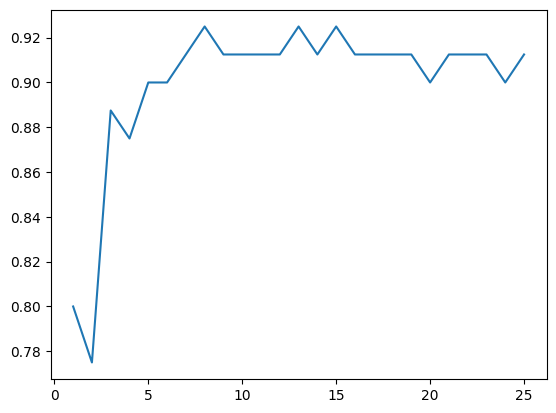

In [30]:
plt.plot(range(1,26), accuracy)

In [31]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [32]:
y_pred = knn.predict(X_test)

In [33]:
accuracy_score(y_test, y_pred)

0.9125

# creating a function to get input from user and predict

In [34]:
def predict_output():
    age = int(input("enter age: "))
    salary = int(input("enter salary: "))

    X_new = np.array([[age],[salary]]).reshape(1,2)
    X_new=scaler.transform(X_new) # to scale the data 15000~0.0867
    # return knn.predict(X_new)[0] #adding this [0] to get just the answer and its readable ans
    if knn.predict(X_new)[0] == 0:
        return "will not purchase"
    else:
        return "will purchase"

In [35]:
# the shape is comming (2,1) which is wrong we want (1,2) that is 1 row and 2 columns so we reshape it
# predict_output()

#output
# enter age:  20
# enter salary:  15000
# (2, 1)

In [36]:
# predict_output()

#output
# enter age:  20
# enter salary:  150000
# 1

In [37]:
predict_output()

enter age:  23
enter salary:  20000


'will not purchase'

# 1. Decision Boundary for Knn

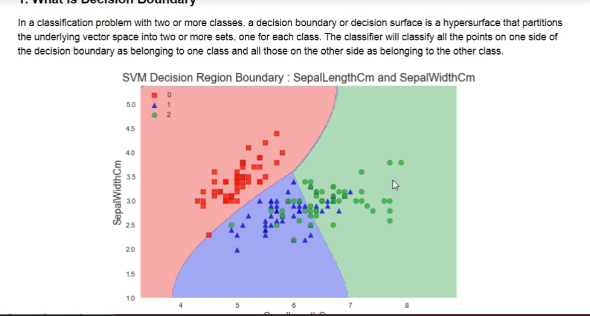

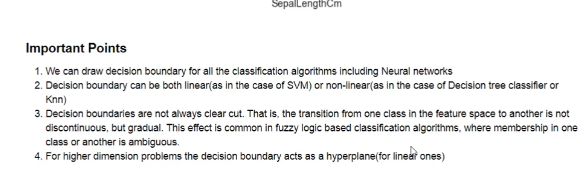

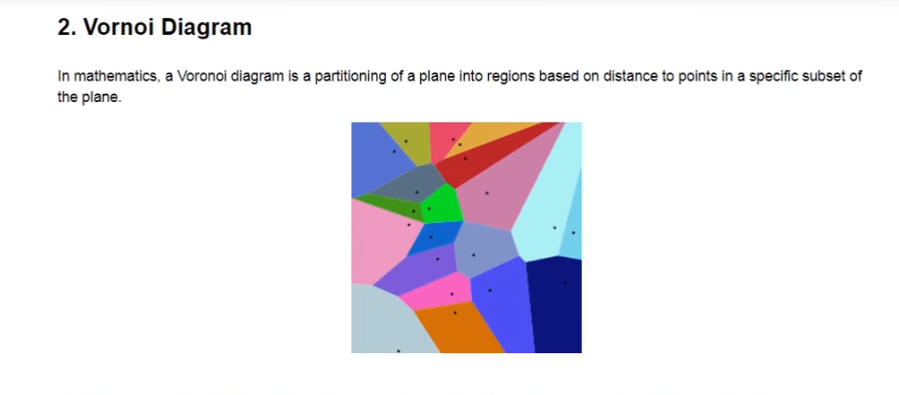

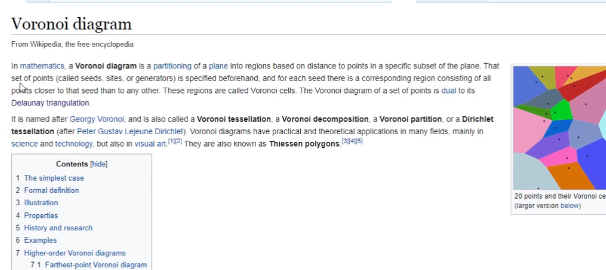

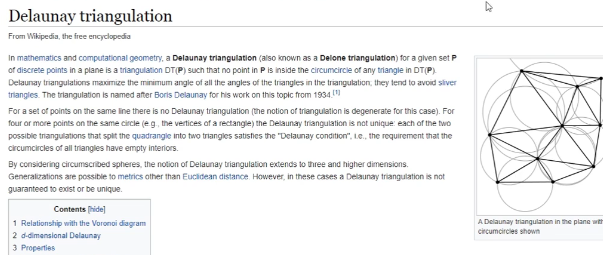

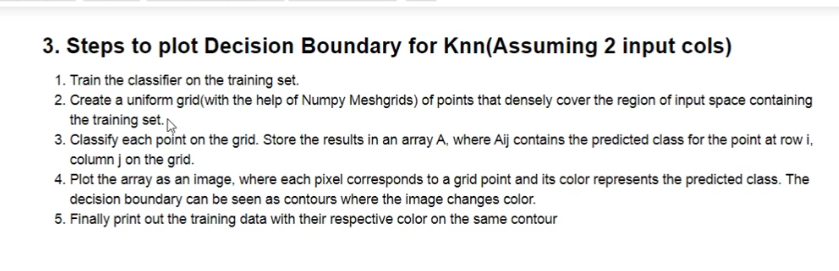

* 1st step is already done we have created a knn classifier
* 2nd we need to create a meshgrid

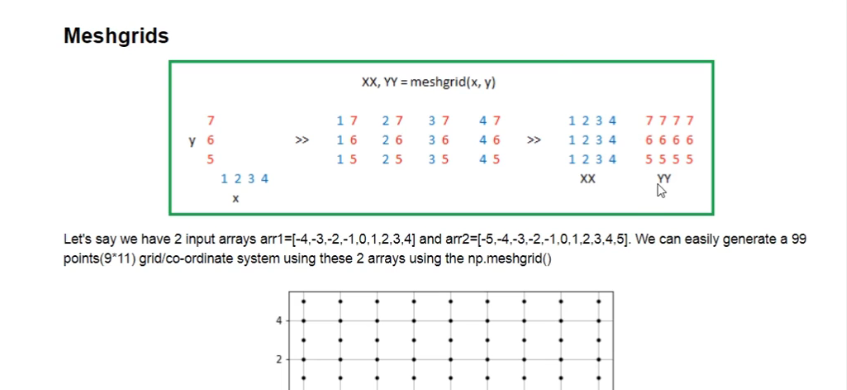

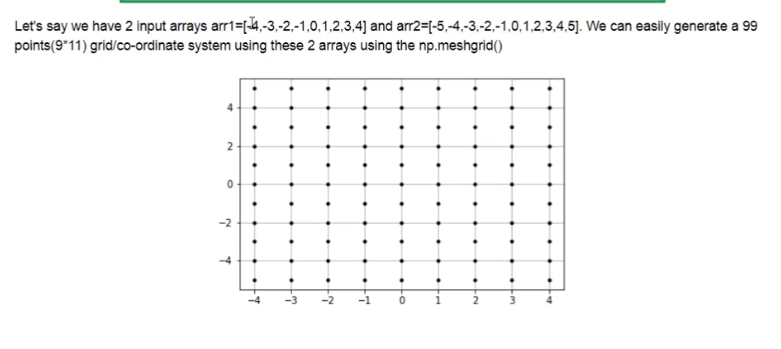

## Creating a Sample Meshgrid

In [38]:
x = np.array([1,2,3])
y = np.array([4,5,6,7])

xx, yy = np.meshgrid(x,y)

print(xx.shape)
print(yy.shape)

(4, 3)
(4, 3)


### Purpose of Meshgrid
* Meshgrid is very useful to evaluate functions on a grid. We can apply any function to the points of a meshgrid to plot a function

### Plotting a function using Meshgrid

In [39]:
x = np.linspace(-40,40,100)
y = np.linspace(-50,50,90)

xx, yy = np.meshgrid(x,y)

In [40]:
print(xx.shape)
print(yy.shape)

(90, 100)
(90, 100)


In [41]:
z = (xx**2) + (yy**2) # elipse equation

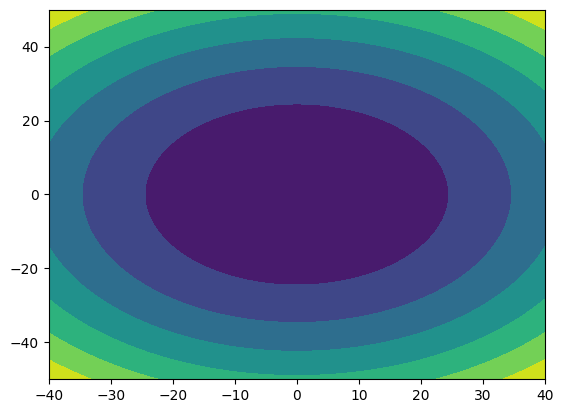

In [42]:
plt.contourf(xx,yy,z)

In [43]:
z = np.random.random((90,100))

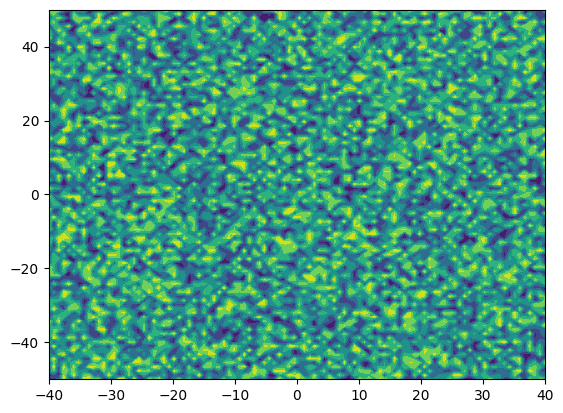

In [44]:
plt.contourf(xx,yy,z)

## step 2: Creating a Meshgrid

In [46]:
a = np.arange(start=X_train[:,0].min()-1, stop=X_train[:,0].max()+1, step=0.01)
b = np.arange(start=X_train[:,1].min()-1, stop=X_train[:,1].max()+1, step=0.01)

In [49]:
xx, YY = np.meshgrid(a, b)

In [50]:
xx.shape

(597, 610)

In [51]:
YY.shape

(597, 610)

## Step 3: Classifiying every point on the meshgrid

In [52]:
xx[0][0] #age value of the first customer

-2.926298866385636

In [53]:
YY[0][0] #salaray value of the first customer

-2.6251377092219745

In [54]:
knn.predict(np.array([-2.926298866385636, -2.6251377092219745]).reshape(1,2))

array([0])

In [56]:
m = np.array([[1,2,3],[4,5,6]])
n = np.array([[7,8,9],[0,0,0]])

np.array([m.ravel(), n.ravel()]).shape # ravel converts an n-dimensional array into 1d array

(2, 6)

In [57]:
np.array([xx.ravel(), YY.ravel()])

array([[-2.92629887, -2.91629887, -2.90629887, ...,  3.14370113,
         3.15370113,  3.16370113],
       [-2.62513771, -2.62513771, -2.62513771, ...,  3.33486229,
         3.33486229,  3.33486229]])

In [58]:
np.array([xx.ravel(), YY.ravel()]).shape

(2, 364170)

In [60]:
# we want the shape to be in xyzlkj, 2 so we take transpose
input_array = np.array([xx.ravel(), YY.ravel()]).T

In [61]:
input_array.shape

(364170, 2)

In [62]:
labels = knn.predict(input_array)

In [63]:
labels.shape

(364170,)

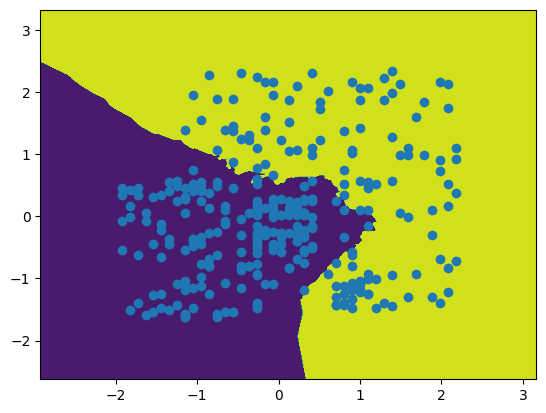

In [64]:
# in the contourf function the x and y must be of the same shape as z 
# that is shape of xx , yy and labels should be same so we need to reshape it 

plt.contourf(xx, YY, labels.reshape(xx.shape))
plt.scatter(X_train[:,0],X_train[:,1])

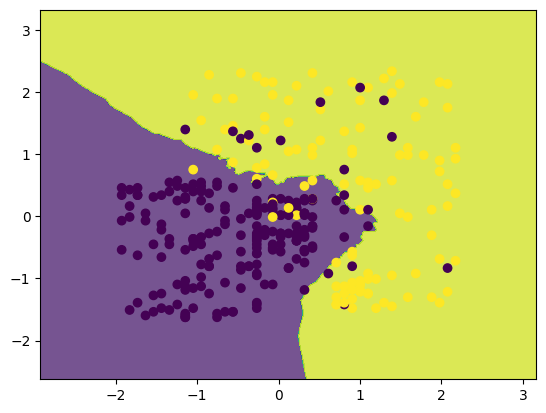

In [65]:

plt.contourf(xx, YY, labels.reshape(xx.shape), alpha=0.75)
plt.scatter(X_train[:,0],X_train[:,1], c=y_train)

# --------------------------------------------------

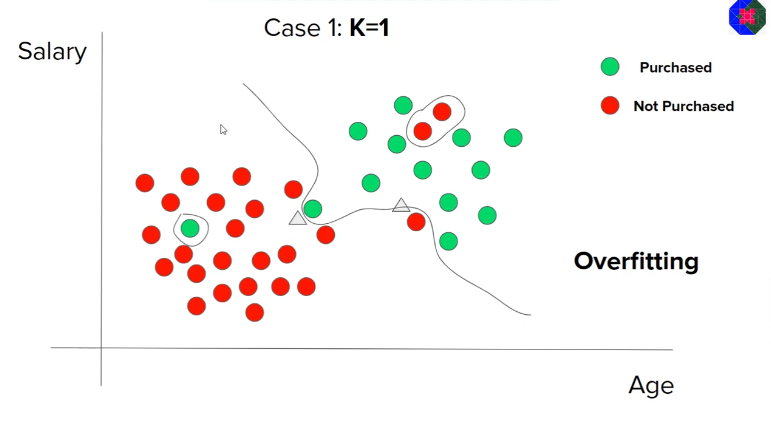

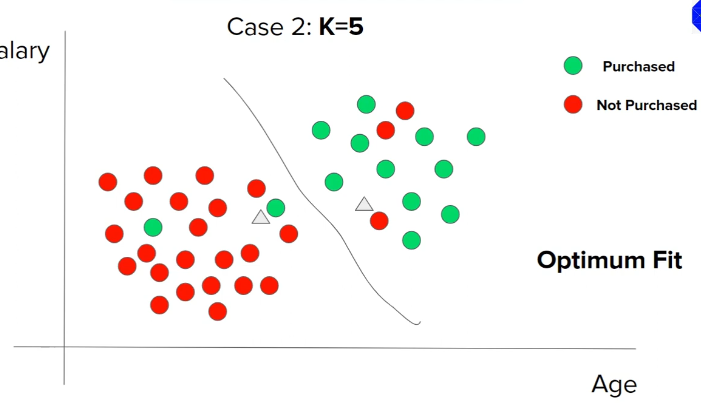

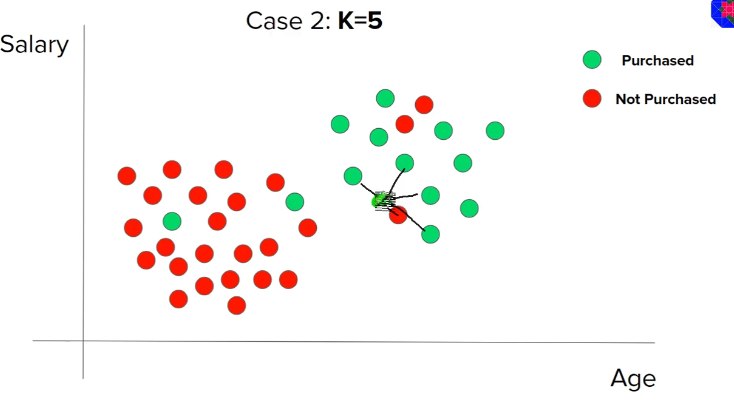

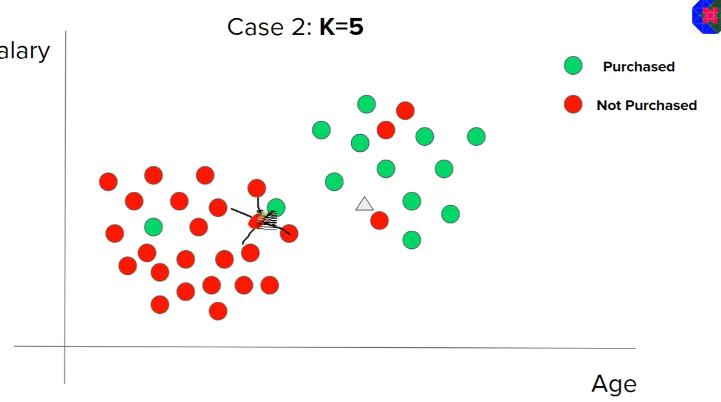

# > it doesnt matter whereever the point is as it will consider all the other points so majority always win

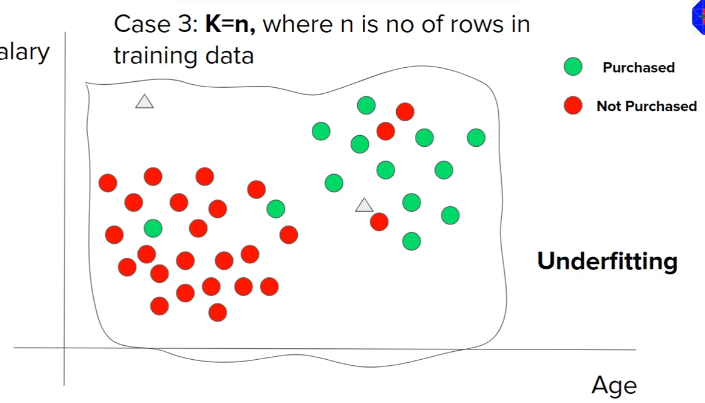

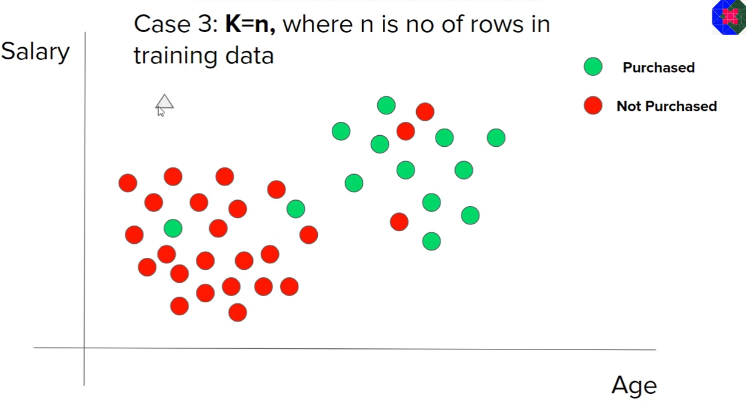

In [66]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[47,  4],
       [ 3, 26]])

* confutions matrix
* 4 and 3 represent the incorrect predicttion
* 47 and 26 are the correct prediction

# Effect of k on Training Error rate and Validation Error rate

In [69]:
error_train = []
error_test = []

for i in range(1,26):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    x=confusion_matrix(y_train, knn.predict(X_train))
    y=confusion_matrix(y_test, knn.predict(X_test))
    error_train.append((x[0][1]+x[1][0])/x.sum())
    error_test.append((y[0][1]+y[1][0])/y.sum())

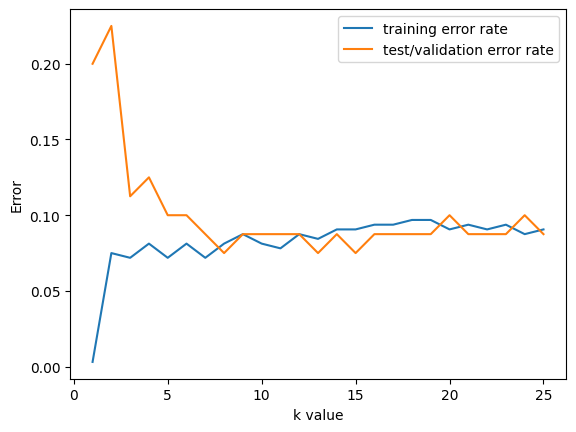

In [71]:
plt.plot(range(1,26), error_train, label='training error rate')
plt.plot(range(1,26), error_test, label='test/validation error rate')
plt.xlabel('k value')
plt.ylabel('Error')
plt.legend()

## from the above graph we can chose the best k value where both come close